In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data set
train = pd.read_csv('C:/Users/91779/Desktop/train.csv')
test = pd.read_csv('C:/Users/91779/Desktop/test.csv')

In [3]:
#Analyze data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Analyze data
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Analyze data
train.shape

(42000, 785)

In [6]:
#Analyze data
test.shape

(28000, 784)

In [7]:
#Check data
train.isnull().sum().sum()
# no missing value

0

In [8]:
#Check data
test.isnull().sum().sum()
# no missing value

0

In [9]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [11]:
# get sorted numbers present in label column
sorted_numbers = list(np.sort(train['label'].unique()))
print(sorted_numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


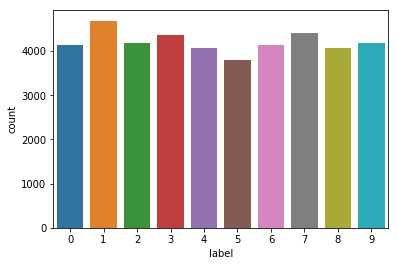

In [12]:
# visualize different classes
sns.countplot(train["label"])

Text(0.5,1,'Digit 1')

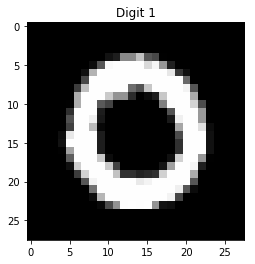

In [13]:
# Plot 0 and convert into matrix

zero = train.iloc[1, 1:]
zero.shape
zero = zero.values.reshape(28,28)
plt.imshow(zero, cmap='gray')
plt.title("Digit 1")

Text(0.5,1,'Digit 1')

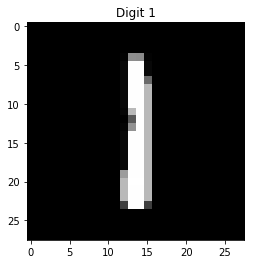

In [14]:
# Plot 1 and convert into matrix

one = train.iloc[2, 1:]
one.shape
one = one.values.reshape(28,28)
plt.imshow(one, cmap='gray')
plt.title("Digit 1")

Text(0.5,1,'4')

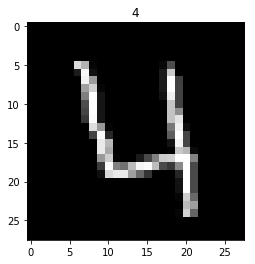

In [15]:
# Plot 4 and convert into matrix

four = train.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("4")

In [16]:
# check duplicates
train.duplicated().sum()

0

In [17]:
# check duplicates
train.duplicated().sum()

0

In [18]:
# check max value for outliers
round(train.drop('label', axis=1).max(), 2)

pixel0        0
pixel1        0
pixel2        0
pixel3        0
pixel4        0
pixel5        0
pixel6        0
pixel7        0
pixel8        0
pixel9        0
pixel10       0
pixel11       0
pixel12     116
pixel13     254
pixel14     216
pixel15       9
pixel16       0
pixel17       0
pixel18       0
pixel19       0
pixel20       0
pixel21       0
pixel22       0
pixel23       0
pixel24       0
pixel25       0
pixel26       0
pixel27       0
pixel28       0
pixel29       0
           ... 
pixel754      0
pixel755      0
pixel756      0
pixel757      0
pixel758      0
pixel759      0
pixel760      0
pixel761    177
pixel762    231
pixel763    253
pixel764    254
pixel765    254
pixel766    255
pixel767    255
pixel768    255
pixel769    255
pixel770    255
pixel771    255
pixel772    255
pixel773    255
pixel774    254
pixel775    254
pixel776    253
pixel777    253
pixel778    254
pixel779     62
pixel780      0
pixel781      0
pixel782      0
pixel783      0
Length: 784, dtype: int6

In [19]:
# check min value for outliers
round(train.drop('label', axis=1).min(), 2)

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [20]:
# Separate the X and Y (target) variable
Y = train['label']
# Dropping the variable 'label' from X variable 
X = train.drop(columns = 'label')

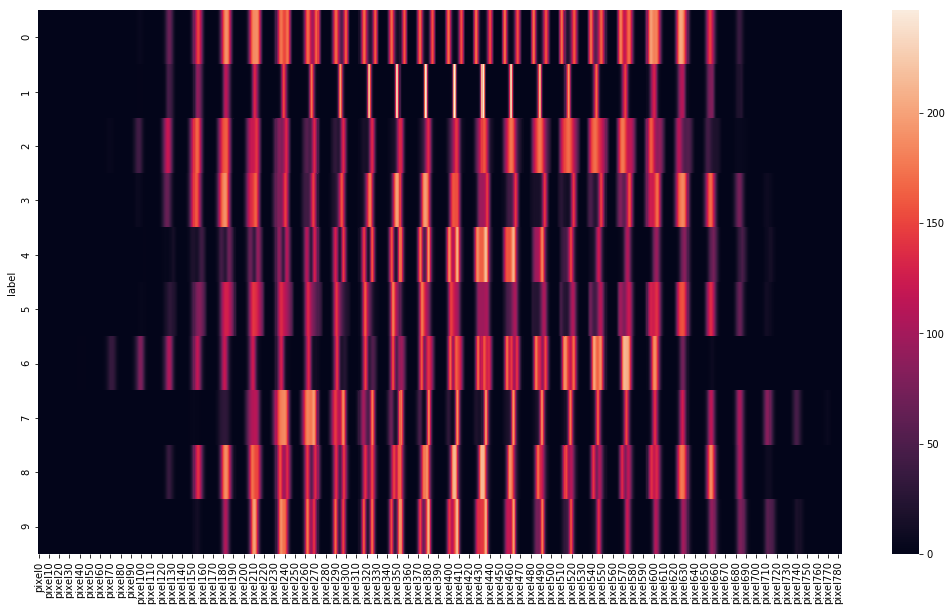

In [21]:
plt.figure(figsize=(18, 10))
sns.heatmap(train.groupby('label').mean())

In [22]:
# scale data
from sklearn.preprocessing import scale
df_train_scaled = scale(X)

In [23]:
# train test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_scaled, Y, test_size = 0.8, train_size = 0.2 ,random_state = 10)

# Model Building

In [24]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [25]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
metrics.accuracy_score(y_true=y_test, y_pred=y_pred)*100

90.62797619047619

In [26]:
# Accuracy with Linear = 90.6%

In [27]:
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[3228    1    7    6    8   16   33    3    5    2]
 [   0 3641   17   14    5    4    4    5   16   10]
 [  37   53 3013   56   57   13   37   25   39    5]
 [  22   22  103 3069   11  155    6   21   67   34]
 [  12   12   32    7 2994    8   16   22    7  144]
 [  48   25   29  130   38 2683   38    5   49   21]
 [  35    9   66    2   31   33 3077    1   10    0]
 [  14   26   74   22   83   16    2 3173    5  121]
 [  37   88   57  112   25  108   31   18 2760   34]
 [  11    9   29   47  190   28    1  186   26 2813]]


In [28]:
#class wise report
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      3309
          1       0.94      0.98      0.96      3716
          2       0.88      0.90      0.89      3335
          3       0.89      0.87      0.88      3510
          4       0.87      0.92      0.89      3254
          5       0.88      0.88      0.88      3066
          6       0.95      0.94      0.95      3264
          7       0.92      0.90      0.91      3536
          8       0.92      0.84      0.88      3270
          9       0.88      0.84      0.86      3340

avg / total       0.91      0.91      0.91     33600



In [29]:
# Using rbf kernel, C=1, non- linear model

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [30]:
metrics.accuracy_score(y_true=y_test, y_pred=y_pred)*100

93.74404761904762

In [31]:
# Accuracy with non-Linear = 93.7%

In [32]:
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[3220    0   27    4    3    7   28    4   14    2]
 [   0 3643   26   10    6    5    5    4   12    5]
 [  15   11 3182   16   33    2   15   25   32    4]
 [   5   10  120 3191    3   66    7   34   60   14]
 [   4    6   54    0 3067    9   17   25    2   70]
 [  23    5   45   77   19 2792   54    6   28   17]
 [  18    4   74    0   13   22 3119    0   14    0]
 [   5   22   84    6   30    2    1 3287    3   96]
 [  19   39   49   50   20   57   19   14 2977   26]
 [   8    8   51   45   76    9    0  100   23 3020]]


In [33]:
#class wise report
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      3309
          1       0.97      0.98      0.98      3716
          2       0.86      0.95      0.90      3335
          3       0.94      0.91      0.92      3510
          4       0.94      0.94      0.94      3254
          5       0.94      0.91      0.92      3066
          6       0.96      0.96      0.96      3264
          7       0.94      0.93      0.93      3536
          8       0.94      0.91      0.93      3270
          9       0.93      0.90      0.92      3340

avg / total       0.94      0.94      0.94     33600



#  Hyper Tuning parameters

In [34]:
# Set up the parameters
hyperParameter = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [1, 10, 100]}]

# select model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, param_grid = hyperParameter, scoring= 'accuracy', 
                        cv = KFold(n_splits = 5, shuffle = True, random_state = 10), 
                        verbose = 1, return_train_score=True, n_jobs = -1)      

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 18.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [35]:
# results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,306.305364,1.777470,40.094420,0.398340,1,0.01,"{'C': 1, 'gamma': 0.01}",0.739881,0.759524,0.754167,...,0.747738,0.008328,9,0.999702,0.999851,0.999851,0.999851,0.999702,0.999792,0.000073
1,78.360941,1.097847,23.341986,0.300300,1,0.001,"{'C': 1, 'gamma': 0.001}",0.926190,0.928571,0.922024,...,0.927738,0.003850,3,0.970685,0.970685,0.969196,0.970685,0.972321,0.970714,0.000989
2,115.507678,1.080788,31.312494,0.241337,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.897024,0.901190,0.889286,...,0.896548,0.004524,6,0.913244,0.911756,0.911756,0.913839,0.912202,0.912560,0.000840
3,314.314670,5.981543,40.167032,0.666086,10,0.01,"{'C': 10, 'gamma': 0.01}",0.757738,0.771429,0.773810,...,0.764643,0.007267,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,66.154012,0.984590,20.732158,0.337900,10,0.001,"{'C': 10, 'gamma': 0.001}",0.938095,0.944048,0.938095,...,0.939286,0.003282,1,0.999107,0.998810,0.999405,0.998958,0.998661,0.998988,0.000256
5,53.665499,1.049720,19.884411,0.199751,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.923810,0.918452,0.913095,...,0.920357,0.005098,5,0.957440,0.955208,0.956548,0.957292,0.956101,0.956518,0.000817
6,310.123608,7.478643,29.241587,1.078859,100,0.01,"{'C': 100, 'gamma': 0.01}",0.757738,0.771429,0.773810,...,0.764643,0.007267,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,66.281662,1.184205,21.160613,0.398573,100,0.001,"{'C': 100, 'gamma': 0.001}",0.936905,0.942262,0.933929,...,0.937976,0.003181,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,36.900319,3.438711,13.843480,2.249634,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.925595,0.926190,0.914881,...,0.920714,0.004492,4,0.992411,0.992113,0.992262,0.992708,0.993155,0.992530,0.000369


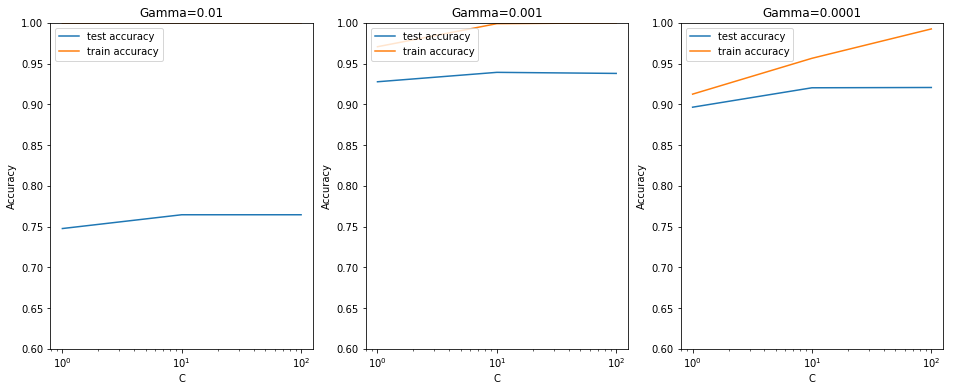

In [36]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [37]:
print("The best test score is {0} corresponding to hyperparameters {1}".format(model_cv.best_score_, model_cv.best_params_))

The best test score is 0.9392857142857143 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [38]:
# final model
final_model = SVC(C=10, gamma=0.001, kernel="rbf")

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# print accuracy
metrics.accuracy_score(y_test, y_pred)* 100

94.63988095238095

In [39]:
#class wise final report
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97      3309
          1       0.97      0.98      0.98      3716
          2       0.88      0.95      0.92      3335
          3       0.94      0.93      0.94      3510
          4       0.94      0.95      0.94      3254
          5       0.94      0.93      0.94      3066
          6       0.97      0.96      0.96      3264
          7       0.94      0.94      0.94      3536
          8       0.96      0.92      0.94      3270
          9       0.95      0.92      0.93      3340

avg / total       0.95      0.95      0.95     33600



In [40]:
# The accuracy from a non-linear kernel after tuning hyperparameter (94.6%) is much higher than that from linear kernel (90.6%).
# From this we can say that the problem is highly non-linear.

In [41]:
# Do prediction test dataset
df_test_scaled = scale(test)
final=final_model.predict(df_test_scaled)
results =pd.DataFrame(final,columns=['Label'],index=np.arange(1,28001))

In [42]:
#results
results.head()

,Label
1,2
2,0
3,9
4,4
5,3


In [43]:
# saving results in csv file
results.to_csv('results.csv',index_label='ImageSerialNumber')